# Predicting Default of Credit Card Clients

---


by Michael Alfarino

[Linkedin](https://www.linkedin.com/in/michaelalfarino/) | [Github](https://github.com/michaelalfarino)

The dataset is obtained from [Kaggle](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset), which is taken from UCI Machine Learning Repository (Default of Credit Card Clients Dataset).

# 1. About the Dataset
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

## Features Information


* `ID`: ID of each client
* `LIMIT_BAL`: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* `SEX`: Gender (1=male, 2=female)
* `EDUCATION`: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* `MARRIAGE`: Marital status (1=married, 2=single, 3=others)
* `AGE`: Age in years
* `PAY_0`: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* `PAY_2`: Repayment status in August, 2005 (scale same as above)
* `PAY_3`: Repayment status in July, 2005 (scale same as above)
* `PAY_4`: Repayment status in June, 2005 (scale same as above)
* `PAY_5`: Repayment status in May, 2005 (scale same as above)
* `PAY_6`: Repayment status in April, 2005 (scale same as above)
* `BILL_AMT1`: Amount of bill statement in September, 2005 (NT dollar)
* `BILL_AMT2`: Amount of bill statement in August, 2005 (NT dollar)
* `BILL_AMT3`: Amount of bill statement in July, 2005 (NT dollar)
* `BILL_AMT4`: Amount of bill statement in June, 2005 (NT dollar)
* `BILL_AMT5`: Amount of bill statement in May, 2005 (NT dollar)
* `BILL_AMT6`: Amount of bill statement in April, 2005 (NT dollar)
* `PAY_AMT1`: Amount of previous payment in September, 2005 (NT dollar)
* `PAY_AMT2`: Amount of previous payment in August, 2005 (NT dollar)
* `PAY_AMT3`: Amount of previous payment in July, 2005 (NT dollar)
* `PAY_AMT4`: Amount of previous payment in June, 2005 (NT dollar)
* `PAY_AMT5`: Amount of previous payment in May, 2005 (NT dollar)
* `PAY_AMT6`: Amount of previous payment in April, 2005 (NT dollar)
* `default.payment.next.month`: Default payment (1=yes, 0=no)



# 2. Objective
The objective of this project is to build a machine learning model that predicts loan default. The dataset used for this analysis contains various features related to clients, such as their credit limit, gender, education level, marital status, age, and repayment status across multiple months. The target, 'default.payment.next.month,' indicates whether a client defaulted on their payment in the following month. By training a classification model on historical loan data, we aim to develop a predictive model that can accurately identify clients who are at a higher risk of defaulting on their loan payments. This model can be utilized by financial institutions to assess creditworthiness, make informed lending decisions, and implement appropriate risk mitigation strategies.

Lets import basic libraries and import the data from csv.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

seed = 42

In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/Predicting Loan Default/UCI_Credit_Card.csv'
df = pd.read_csv(path)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# 3. Data Preprocessing
Next, let's visualize the dataset using missingno.

<Axes: >

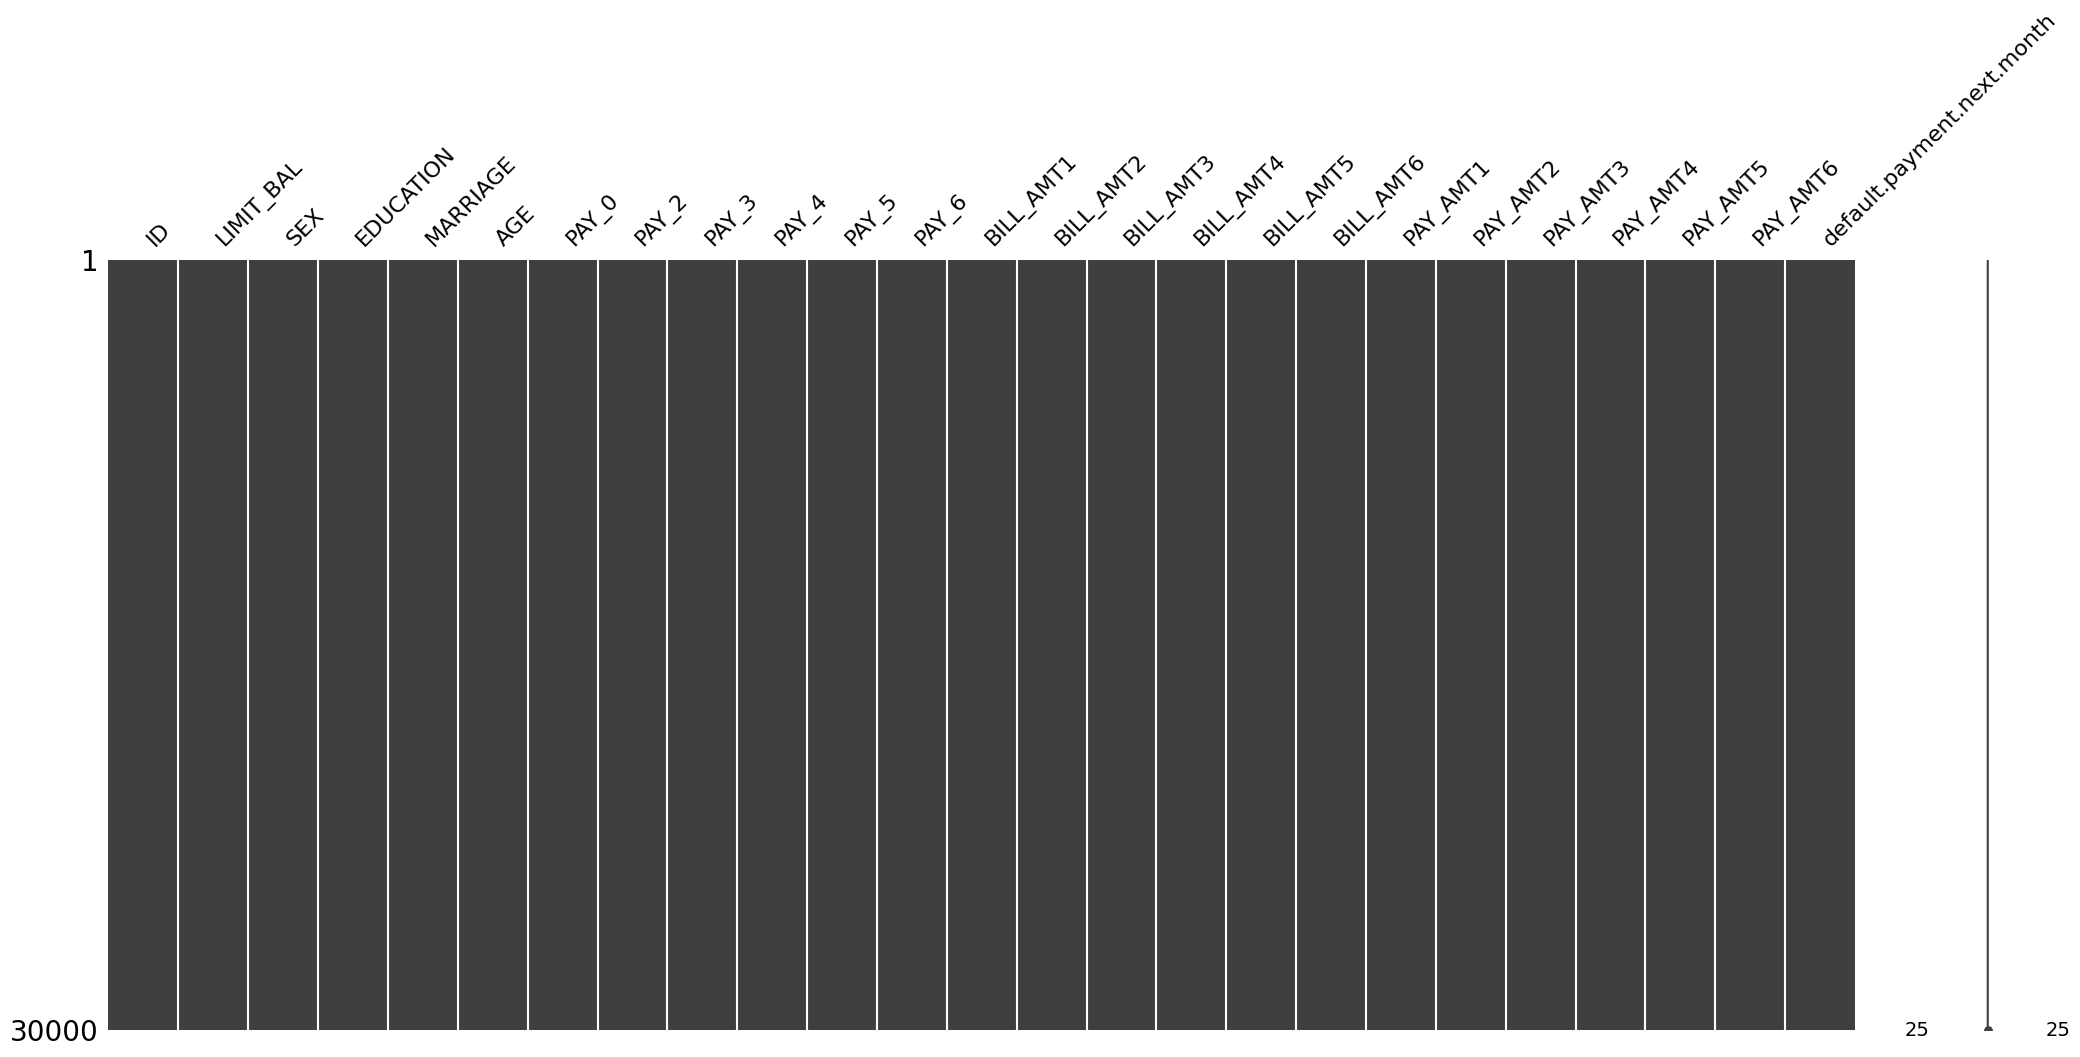

In [3]:
import missingno as msno
msno.matrix(df)

It is apparent that there are 30.000 instances with no missing values. Let's analyze the dataset further. We check individually the categorical and numerical features of the dataset. Let's also rename the `PAY_0` column to `PAY_1` for consistency.

In [4]:
# Rename column
df.rename(columns = {'PAY_0': 'PAY_1'}, inplace = True)

# List of categorical and numerical features and target
categorical_features = [
    'SEX',
    'EDUCATION',
    'MARRIAGE',
    'PAY_1',
    'PAY_2',
    'PAY_3',
    'PAY_4',
    'PAY_5',
    'PAY_6'
]

numerical_features = [
    'LIMIT_BAL',
    'AGE',
    'BILL_AMT1',
    'BILL_AMT2',
    'BILL_AMT3',
    'BILL_AMT4',
    'BILL_AMT5',
    'BILL_AMT6',
    'PAY_AMT1',
    'PAY_AMT2',
    'PAY_AMT3',
    'PAY_AMT4',
    'PAY_AMT5',
    'PAY_AMT6'
]

target = [
    'default.payment.next.month'
]

## Categorical Features

In [5]:
# Description of the categorical features
df[categorical_features].describe()

,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,0.489129,0.790349,0.521970,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,1.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,6.000000,3.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


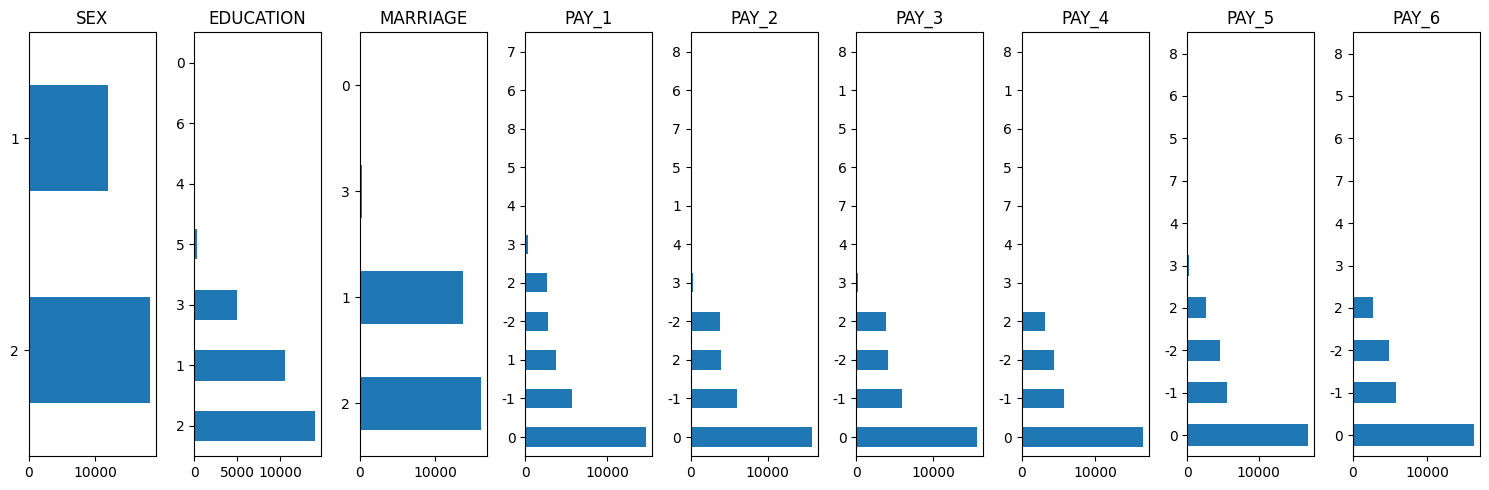

In [6]:
# Plot each categorical feature in a barh plot
fig, axes = plt.subplots(nrows=1, ncols=9, figsize=(15, 5))
j = 0
for i in categorical_features:
  df[i].value_counts().plot(ax=axes[j], kind='barh'); axes[j].set_title(i)
  j += 1
fig.tight_layout()


We can see that:
* `EDUCATION` feature has category 5 and 6 that are unlabelled. Additionally, the category 0 is undocumented.
* `MARRIAGE` has a category 0 that is undocumented.
* All `PAY_n` features has undocumented label (-2).

We apply the following:
* Let's put category 0, 5, and 6 in `EDUCATION` to category 4 'Other'
* We also put category 0 in `MARRIAGE` to category 3 'Other'
* If -1 represents 'pay duly', it raises the question of how to interpret -2. One could argue that any payment made duly should fall into a single category. In this case, we can assign this category the value of 0.
* We also assign females that is originally labeled with 2 into 0.

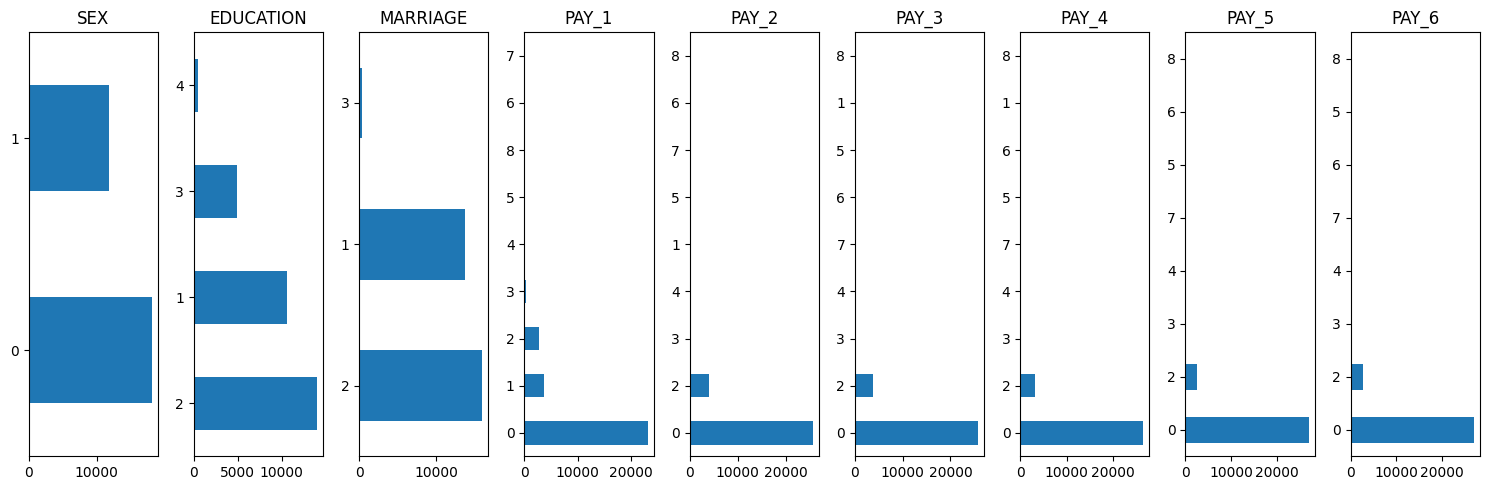

In [7]:
# Replacement of the values as stated above
df.loc[(df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0), 'EDUCATION'] = 4

df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3

for i in categorical_features[3:]:
  df.loc[(df[i] == -2) | (df[i] == -1) | (df[i] == 0), i] = 0

df.loc[df.SEX == 2, 'SEX'] = 0


# We analyze the plot again
fig, axes = plt.subplots(nrows=1, ncols=9, figsize=(15, 5))
j = 0
for i in categorical_features:
  df[i].value_counts().plot(ax=axes[j], kind='barh'); axes[j].set_title(i)
  j += 1
fig.tight_layout()

All of the categorical features are already encoded, so there is no need to apply additional encoding techniques.

## Numerical Features

In [8]:
# Description of the numerical features
df[numerical_features].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


Let's check the distribution of the data with seaborn.

In [9]:
def draw_hist(df, var, n_rows, n_cols, n_bins):
    fig=plt.figure(figsize=(20,7))
    for i, var_name in enumerate(var):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.histplot(df[var_name], kde=True, stat="density", linewidth=0, bins=n_bins)
        # ax.set_title(var_name)
        # plt.ticklabel_format(useOffset=False, style='plain')
    fig.tight_layout()
    plt.show()

<ipython-input-10-d902e9f759c8>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


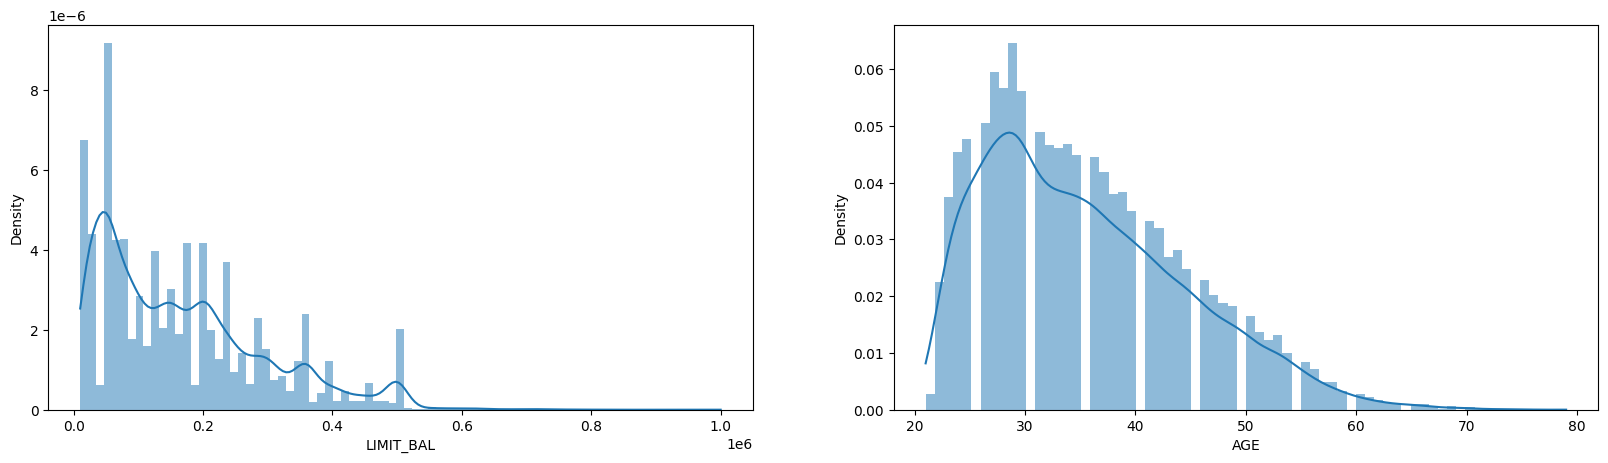

In [10]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.histplot(df.LIMIT_BAL, kde=True, stat="density", linewidth=0)

plt.subplot(122)
sns.histplot(df.AGE, kde=True, stat="density", linewidth=0)

plt.show()

We observe that dataset consists of skewed data of limiting balance and age of clients.

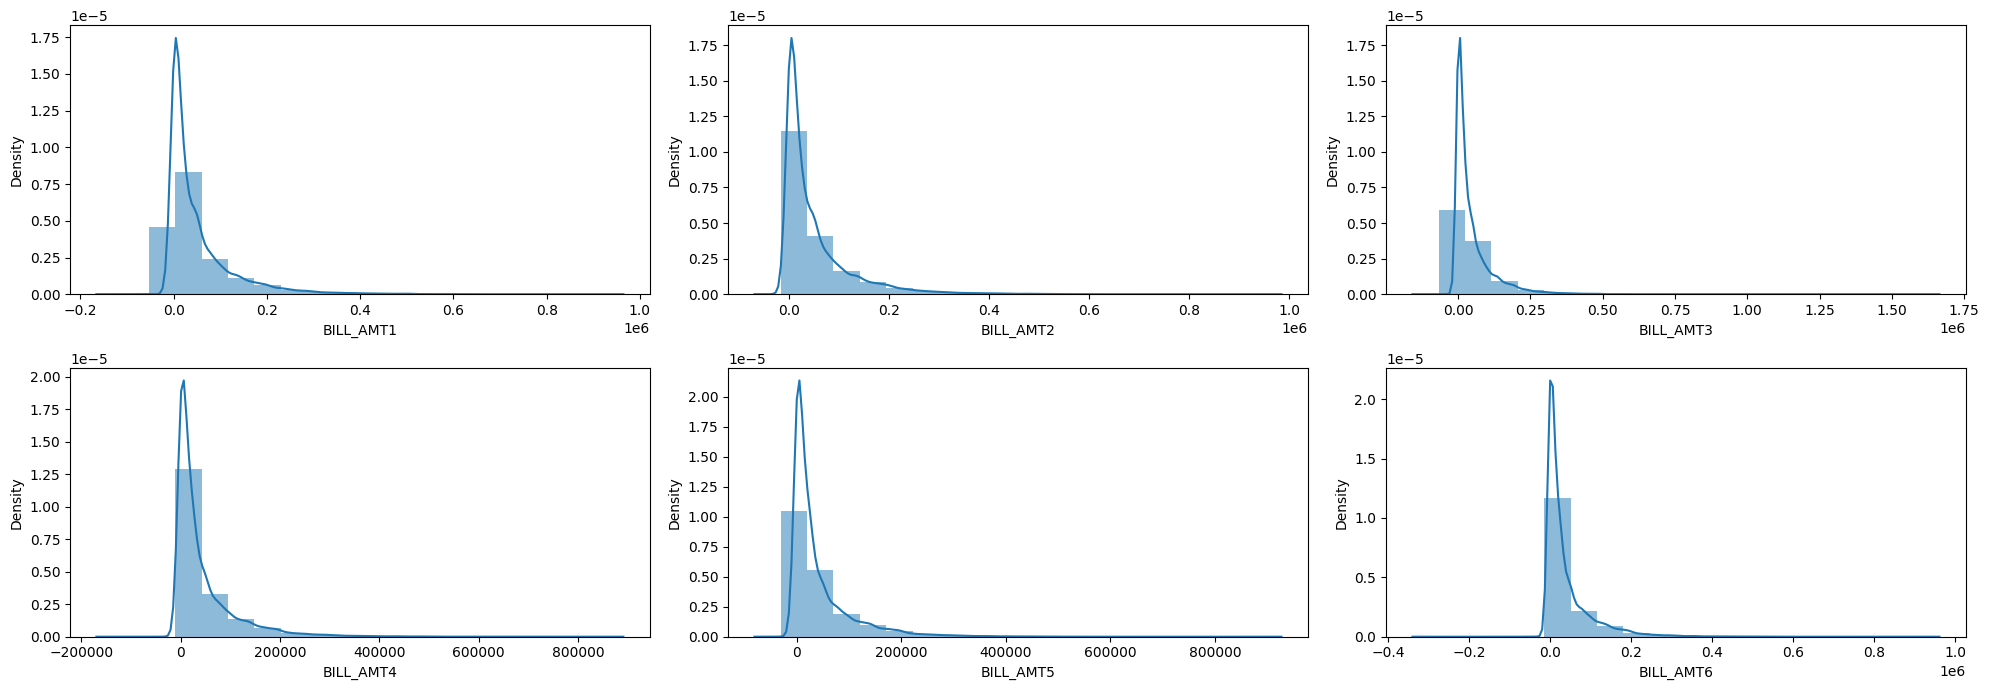

In [11]:
bills = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_hist(bills, bills.columns, 2, 3, 20)

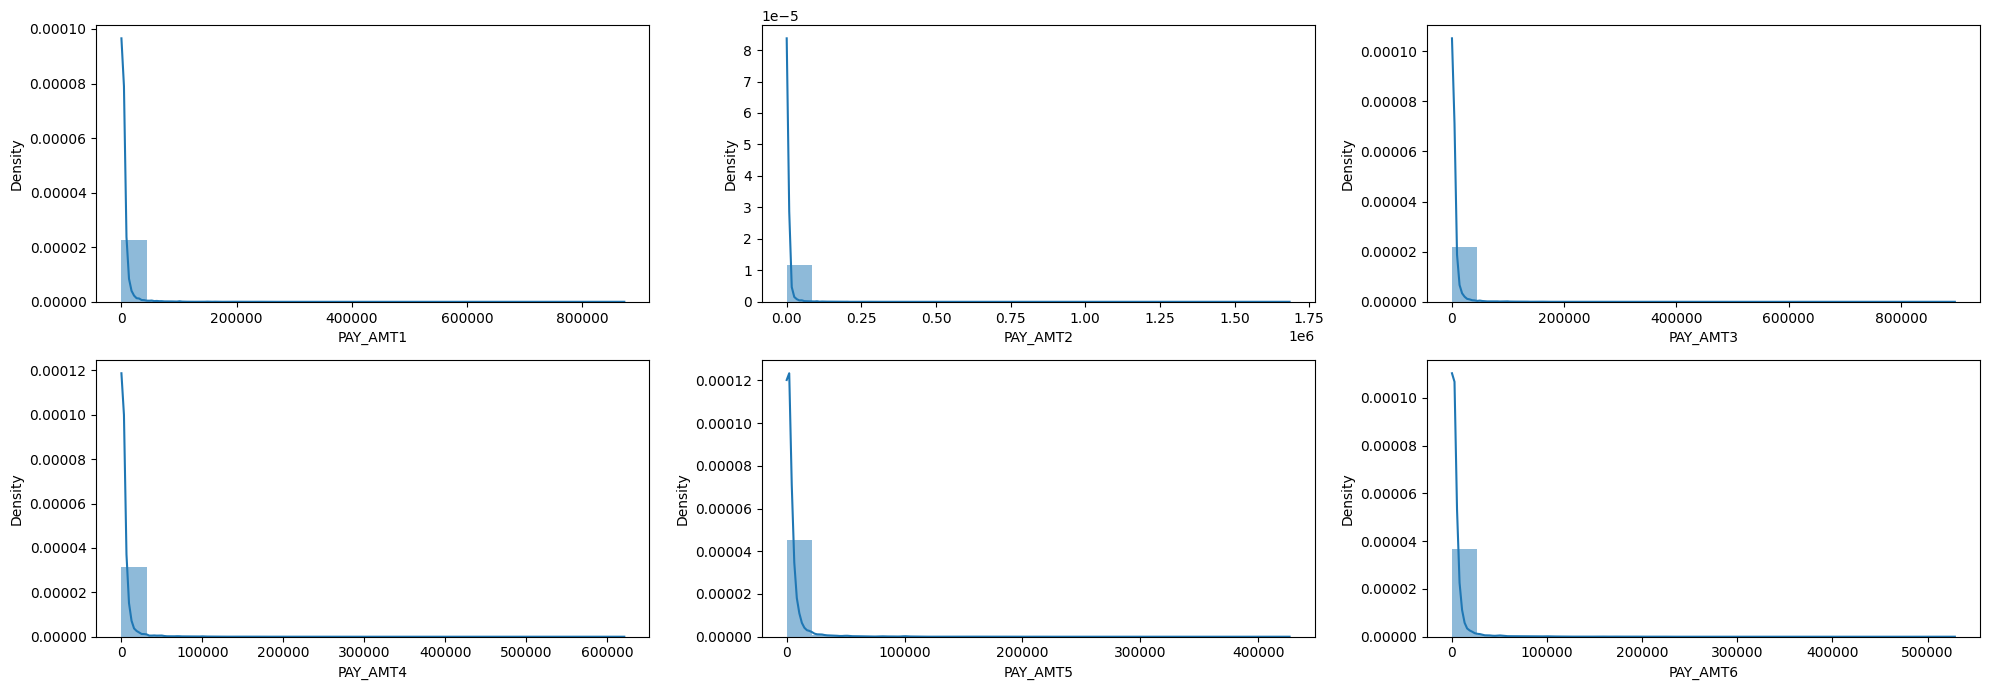

In [12]:
pay = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_hist(pay, pay.columns, 2, 3, 20)

The `PAY_AMT` variables are really skewed and have a very large range. Let's check if these data are outliers or not.

In [13]:
df[df.PAY_AMT1 > 300000][numerical_features+target]

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
2687,500000.0,44,71921.0,367979.0,294969.0,189612.0,128459.0,167105.0,368199.0,6486.0,234.0,90.0,167116.0,372495.0,0
5687,480000.0,39,106660.0,400000.0,66270.0,80274.0,82160.0,110773.0,302000.0,66270.0,15000.0,3044.0,30042.0,34048.0,0
8500,400000.0,28,6500.0,405016.0,391178.0,392932.0,394410.0,410127.0,405016.0,0.0,14000.0,13560.0,28000.0,0.0,0
12330,300000.0,37,-165580.0,324392.0,296931.0,30355.0,26771.0,23737.0,505000.0,331.0,1070.0,17771.0,18000.0,16079.0,0
25431,170000.0,28,30860.0,167941.0,171459.0,173310.0,240738.0,135722.0,304815.0,8000.0,8127.0,4810.0,5000.0,5400.0,0
28003,510000.0,30,71121.0,481382.0,559712.0,163628.0,117475.0,116656.0,493358.0,1227082.0,164577.0,510.0,6239.0,4550.0,0
28716,340000.0,42,139808.0,176743.0,34402.0,205931.0,265431.0,270237.0,873552.0,1215471.0,889043.0,621000.0,20000.0,145000.0,0
29820,400000.0,37,396343.0,394858.0,395716.0,385947.0,305542.0,271385.0,423903.0,15100.0,14600.0,13000.0,9500.0,9500.0,0
29867,340000.0,29,44855.0,331641.0,331334.0,286660.0,263505.0,268256.0,300039.0,13214.0,12005.0,13005.0,10011.0,12005.0,0
29963,610000.0,31,348392.0,322228.0,319014.0,347303.0,248893.0,269528.0,323014.0,1605.0,349395.0,250144.0,271099.0,220076.0,0


In [14]:
df[df.PAY_AMT2 > 300000][numerical_features+target]

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
2592,480000.0,49,-220.0,38929.0,339176.0,33146.0,37337.0,33777.0,39149.0,344261.0,33312.0,37511.0,31383.0,10633.0,0
3774,500000.0,32,103880.0,39356.0,301441.0,37945.0,104491.0,35234.0,39560.0,302961.0,38139.0,104673.0,35387.0,177258.0,0
5296,500000.0,33,125.0,-18088.0,1664089.0,121757.0,97115.0,377217.0,4366.0,1684259.0,121831.0,97670.0,379267.0,26759.0,0
5400,500000.0,49,27891.0,8970.0,385228.0,391047.0,0.0,150.0,8982.0,385228.0,7821.0,0.0,150.0,363.0,0
6150,300000.0,39,-3928.0,-5973.0,4735.0,6186.0,116.0,14429.0,1720.0,344467.0,6822.0,49.0,15000.0,12000.0,1
6864,500000.0,30,192257.0,201402.0,444462.0,418237.0,424244.0,383145.0,40000.0,300018.0,15000.0,17000.0,15000.0,11100.0,0
9044,500000.0,36,51465.0,24201.0,384973.0,349790.0,315125.0,16576.0,24201.0,384986.0,7017.0,6342.0,16576.0,43710.0,0
11568,430000.0,46,52930.0,960.0,354716.0,361373.0,368484.0,365148.0,510.0,358689.0,15066.0,14126.0,13065.0,12908.0,1
11853,360000.0,34,277040.0,-22960.0,338600.0,22960.0,22960.0,0.0,0.0,361560.0,22960.0,0.0,0.0,0.0,0
12829,340000.0,44,327058.0,335584.0,330510.0,272220.0,269629.0,266723.0,16004.0,312723.0,9748.0,9800.0,9569.0,12500.0,1


In [15]:
df[df.PAY_AMT3 > 300000][numerical_features+target]

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
2197,1000000.0,47,964511.0,983931.0,535020.0,891586.0,927171.0,961664.0,50784.0,50723.0,896040.0,50000.0,50000.0,50256.0,0
6912,590000.0,63,630458.0,646770.0,693131.0,324522.0,358774.0,369685.0,28000.0,61115.0,325000.0,40000.0,20000.0,51000.0,0
7297,430000.0,40,6112.0,10548.0,31401.0,417588.0,3414.0,4761.0,10590.0,31448.0,417588.0,3414.0,4761.0,15331.0,0
13098,460000.0,30,396155.0,367501.0,257836.0,388058.0,324478.0,313547.0,15299.0,7524.0,324097.0,12039.0,12006.0,12272.0,0
15080,500000.0,38,130700.0,15785.0,154653.0,450497.0,425957.0,298509.0,15785.0,154653.0,338394.0,16000.0,500.0,19999.0,0
17340,200000.0,32,0.0,0.0,-10542.0,148287.0,146948.0,148772.0,0.0,1685.0,326974.0,5200.0,5500.0,6000.0,0
17662,500000.0,46,24239.0,36674.0,1558.0,310852.0,301854.0,133761.0,15000.0,1558.0,310852.0,10000.0,5000.0,5000.0,0
18115,170000.0,48,6203.0,9932.0,-157264.0,166969.0,164040.0,166416.0,5079.0,0.0,332809.0,6000.0,6000.0,6100.0,0
19918,350000.0,44,110472.0,100849.0,5800.0,369718.0,2000.0,5910.0,100957.0,5800.0,371718.0,2180.0,5910.0,6000.0,0
23449,600000.0,44,140179.0,112498.0,82803.0,380337.0,368527.0,390197.0,5000.0,8340.0,380478.0,12625.0,60000.0,7000.0,0


Looks like these are not outliers but simply just clients with a lot of money.

## Target

In [16]:
# Description of the target
df[target].describe()

,default.payment.next.month
count,30000.000000
mean,0.221200
std,0.415062
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


<Axes: title={'center': 'Default of Credit Card Clients - target values\n (Not Default = 0, Default = 1)'}, xlabel='default.payment.next.month'>

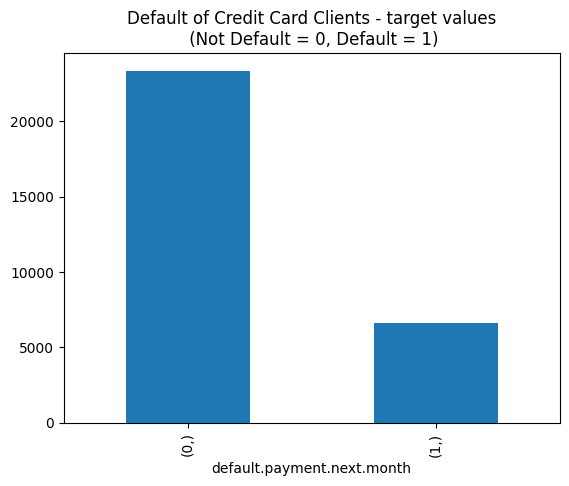

In [17]:
df[target].value_counts().plot(kind='bar', title='Default of Credit Card Clients - target values\n (Not Default = 0, Default = 1)')

In [18]:
print("Ratio of default =", float(df[target].sum()) / df[target].shape[0] * 100, "%")

Ratio of default = 22.12 %


We observe that the dataset is imbalanced, with only 22.12% of the instances belonging to the default class. Thus, we need to be careful when using metrics such as accuracy. Accuracy, as a standalone metric, tends to be biased towards the majority class and may not accurately reflect the model's performance on the minority class. It is more appropriate to consider metrics like precision, recall, F1-score, and ROC-AUC. These metrics provide a comprehensive assessment of the model's performance, particularly in correctly identifying instances of the minority class.
* Precision measures the proportion of correctly predicted positive instances out of all predicted positive instances.
* Recall measures the proportion of correctly predicted positive instances out of all actual positive instances.
* F1-score is the harmonic mean of precision and recall, providing a balanced measure between the two.
* ROC-AUC evaluates the trade-off between true positive and false positive rates, offering an overall measure of the model's performance across different classification thresholds.

## Synthetic Minority Over-sampling Technique (SMOTE)

To handle the imbalance, we upsample the dataset using SMOTE, which effectively increases the number of instances in the minority class by creating synthetic samples while maintaining the original instances in the majority class. This balanced dataset allows the machine learning model to learn from both classes more effectively, preventing biased predictions and improving the overall performance of the classifier. However, it's essential to be cautious when using SMOTE, as generating synthetic samples can introduce noise and overfitting if not applied carefully. Additionally, it's crucial to perform proper cross-validation and evaluation to assess the model's performance accurately on real-world data and avoid potential pitfalls associated with over-optimistic results during training.

In [19]:
features_df = df.drop(columns=target+['ID'])
target_df = df[target]

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
smote = SMOTE(random_state=seed)
features_df_upsampled, target_df_upsampled = smote.fit_resample(features_df, target_df)
features_df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46728 entries, 0 to 46727
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  46728 non-null  float64
 1   SEX        46728 non-null  int64  
 2   EDUCATION  46728 non-null  int64  
 3   MARRIAGE   46728 non-null  int64  
 4   AGE        46728 non-null  int64  
 5   PAY_1      46728 non-null  int64  
 6   PAY_2      46728 non-null  int64  
 7   PAY_3      46728 non-null  int64  
 8   PAY_4      46728 non-null  int64  
 9   PAY_5      46728 non-null  int64  
 10  PAY_6      46728 non-null  int64  
 11  BILL_AMT1  46728 non-null  float64
 12  BILL_AMT2  46728 non-null  float64
 13  BILL_AMT3  46728 non-null  float64
 14  BILL_AMT4  46728 non-null  float64
 15  BILL_AMT5  46728 non-null  float64
 16  BILL_AMT6  46728 non-null  float64
 17  PAY_AMT1   46728 non-null  float64
 18  PAY_AMT2   46728 non-null  float64
 19  PAY_AMT3   46728 non-null  float64
 20  PAY_AM

<Axes: title={'center': 'Default of Credit Card Clients - target values after upsampling\n (Not Default = 0, Default = 1)'}, xlabel='default.payment.next.month'>

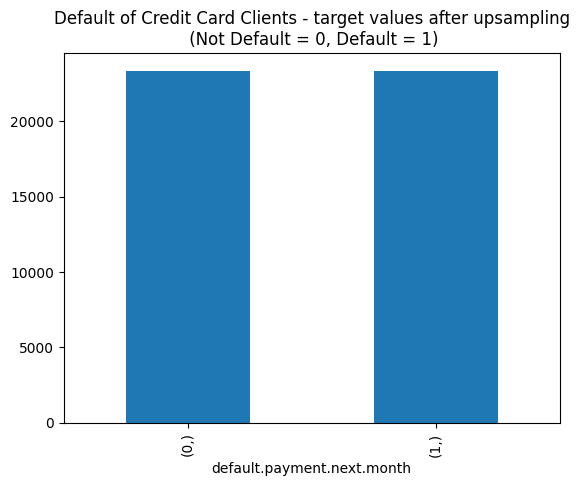

In [22]:
target_df_upsampled.value_counts().plot(kind='bar', title='Default of Credit Card Clients - target values after upsampling\n (Not Default = 0, Default = 1)')

We can see that the dataset is now balanced.

# 4. Predictive Modelling

We first split the dataset for training and testing.

In [23]:
from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(features_df, target_df, test_size=0.2, random_state=seed)

features_train_upsampled, features_test_upsampled, target_train_upsampled, target_test_upsampled = train_test_split(features_df_upsampled, target_df_upsampled, test_size=0.2, random_state=seed)

In [24]:
def plotImp(model, X, num=20, fig_size=(10, 5)):
    if hasattr(model, 'feature_importances_'):
        # For models with feature importances (e.g., tree-based models)
        feature_imp = pd.DataFrame({'Value': list(model.feature_importances_),
                                    'Feature': list(X.columns)})
        title =  str(type(model).__name__) + ' Feature Importance'
    elif hasattr(model, 'coef_'):
        # For linear models like logistic regression
        feature_imp = pd.DataFrame({'Value': list(abs(model.coef_[0])),
                                    'Feature': list(X.columns)})
        title = str(type(model).__name__) + ' Coefficient Importance'
    else:
        raise ValueError("Model does not have feature importances or coefficients available.")

    plt.figure(figsize=fig_size)
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                        ascending=False)[:num])
    plt.title(title)
    plt.tight_layout()
    plt.show()


## Logistic Regression


Logistic Regression is a simple statistical method used for binary classification tasks. It estimates the probability of a binary outcome based on input features, and through a linear function and a logistic transformation, it maps the input data to a range between 0 and 1. The model classifies clients as "default" or "non-default" based on whether the probability threshold is crossed.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score

### Original Dataset

#### The Model

First, let's search for the best hyperparameters using `GridSearchCV`

In [26]:
param_grid_lr = {
    'penalty': ['l2'],  # Vary regularization
    'C': [0.001, 0.01, 0.1, 1.0], # Vary C values for regularization
    'class_weight': [None, 'balanced'],
    'max_iter': np.linspace(100, 1000, 5, dtype=int), # Vary maximum iterations
}

In [27]:
lr = LogisticRegression()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=skf, scoring='f1', n_jobs=-1)
grid_search_lr.fit(features_train, target_train.values.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0],
                         'class_weight': [None, 'balanced'],
                         'max_iter': array([ 100,  325,  550,  775, 1000]),
                         'penalty': ['l2']},
             scoring='f1')

In [28]:
best_lr = grid_search_lr.best_estimator_
print('Logistic Regression Best Parameters:', grid_search_lr.best_params_)

target_pred_lrOri = best_lr.predict(features_test)

best_f1_lr = grid_search_lr.best_score_
print('Non-SMOTE Logistic Regression Best F1-score:')
print('Train: ', round(best_f1_lr, 3), '     Test: ', round(f1_score(target_test, target_pred_lrOri), 3))
print('Test Accuracy: ', round(accuracy_score(target_test, target_pred_lrOri)*100, 3), '%')

Logistic Regression Best Parameters: {'C': 0.001, 'class_weight': 'balanced', 'max_iter': 325, 'penalty': 'l2'}
Non-SMOTE Logistic Regression Best F1-score:
Train:  0.415      Test:  0.419
Test Accuracy:  55.75 %


#### Confusion Matrix

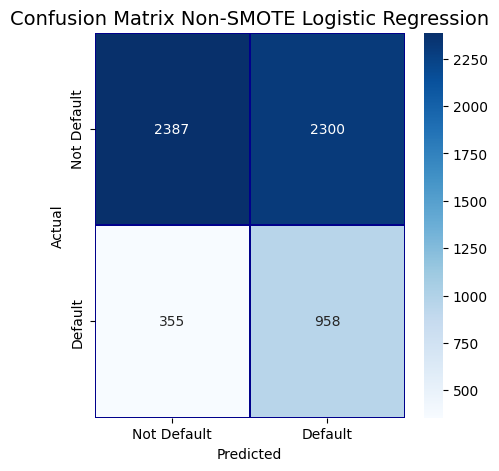

In [29]:
cm = pd.crosstab(target_test.values.ravel(), target_pred_lrOri, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2, linecolor="Darkblue", cmap="Blues", fmt='d')
plt.title('Confusion Matrix Non-SMOTE Logistic Regression', fontsize=14)
plt.show()

#### Feature Importance

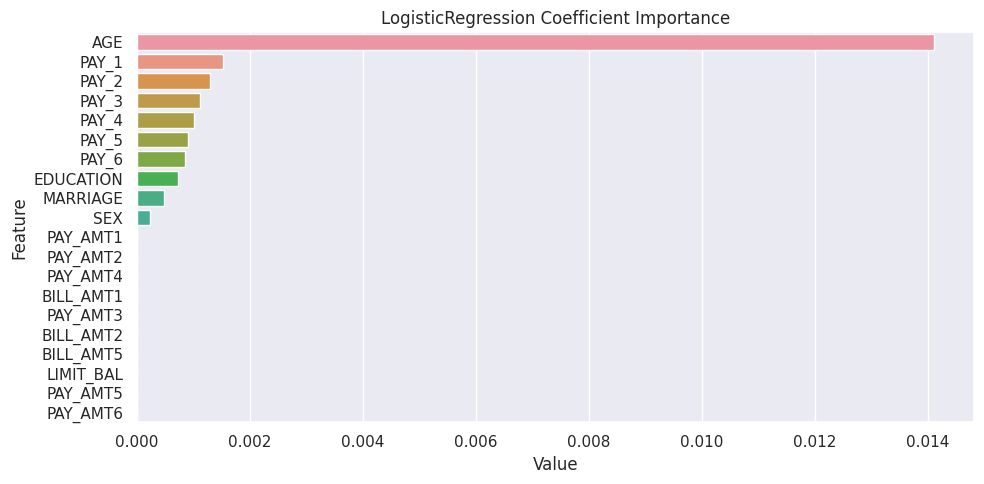

In [30]:
plotImp(best_lr, features_train)

### Upsampled Dataset

In [31]:
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

grid_search_lr_up = GridSearchCV(lr, param_grid_lr, cv=kf, scoring='f1', n_jobs=-1)
grid_search_lr_up.fit(features_train_upsampled, target_train_upsampled.values.ravel())

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0],
                         'class_weight': [None, 'balanced'],
                         'max_iter': array([ 100,  325,  550,  775, 1000]),
                         'penalty': ['l2']},
             scoring='f1')

In [32]:
best_lr_up = grid_search_lr_up.best_estimator_
print('Logistic Regression Best Parameters:', grid_search_lr_up.best_params_)

target_pred_lr = best_lr_up.predict(features_test_upsampled)

best_f1_lr_up = grid_search_lr_up.best_score_
print('SMOTE-Upsampled Logistic Regression Best F1-score:')
print('Train: ', round(best_f1_lr_up, 3), '     Test: ', round(f1_score(target_test_upsampled, target_pred_lr), 3))
print('Test Accuracy: ', round(accuracy_score(target_test_upsampled, target_pred_lr)*100, 3), '%')

Logistic Regression Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 325, 'penalty': 'l2'}
SMOTE-Upsampled Logistic Regression Best F1-score:
Train:  0.664      Test:  0.65
Test Accuracy:  61.352 %


The improvement of the F1-score is very clear. From this point onwards, we will only train on the **upsampled dataset**.

#### Confusion Matrix

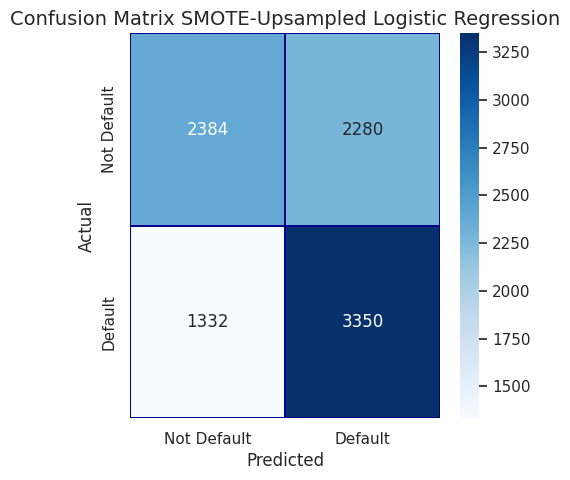

In [33]:
cm = pd.crosstab(target_test_upsampled.values.ravel(), target_pred_lr, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues", fmt='d')
plt.title('Confusion Matrix SMOTE-Upsampled Logistic Regression', fontsize=14)
plt.show()

#### Feature Importance

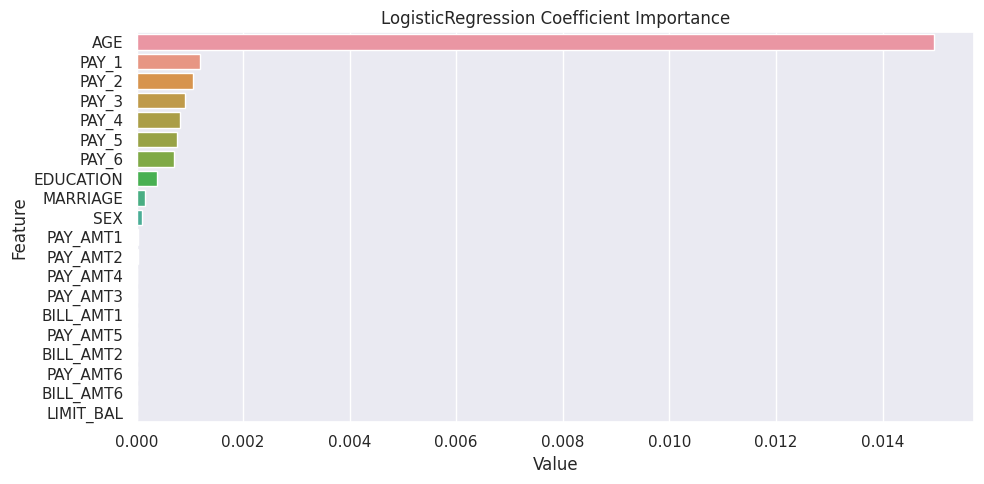

In [34]:
plotImp(best_lr_up, features_train_upsampled)

## Random Forest

The Random Forest Classifier is an ensemble learning method used for classification tasks. It creates multiple decision trees during training and combines their predictions to make more accurate and robust predictions. The model mitigates overfitting, handles large datasets, and provides feature importance.

In [35]:
from sklearn.ensemble import RandomForestClassifier

### Upsampled Dataset

#### The Model

First, let's search for the best hyperparameters using `GridSearchCV`

In [36]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10],  # Maximum depth of the trees (None means full-depth)
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

In [37]:
rf = RandomForestClassifier(random_state=seed)
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

In [38]:
grid_search_rf_up = GridSearchCV(rf, param_grid_rf, cv=kf, scoring='f1', n_jobs=-1)
grid_search_rf_up.fit(features_train_upsampled, target_train_upsampled.values.ravel())

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [39]:
best_rf_up = grid_search_rf_up.best_estimator_
print('Random Forest Best Parameters:', grid_search_rf_up.best_params_)

target_pred_rf = best_rf_up.predict(features_test_upsampled)

best_f1_rf_up = grid_search_rf_up.best_score_
print('Random Forest Best F1-score:')
print('Train: ', round(best_f1_rf_up, 3), '     Test: ', round((f1_score(target_test_upsampled, target_pred_rf)), 3))
print('Test Accuracy: ', round(accuracy_score(target_test_upsampled, target_pred_rf)*100, 3), '%')

Random Forest Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Best F1-score:
Train:  0.832      Test:  0.832
Test Accuracy:  83.715 %


#### Confusion Matrix

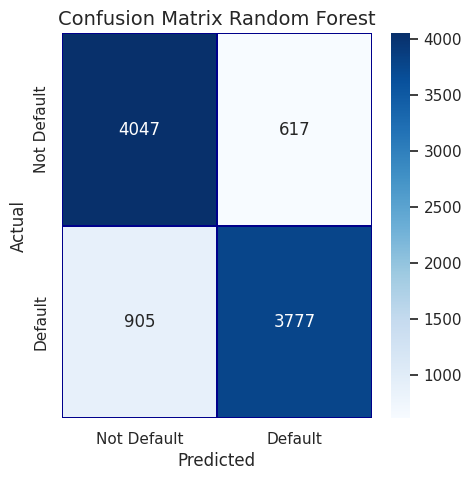

In [40]:
cm = pd.crosstab(target_test_upsampled.values.ravel(), target_pred_rf, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues", fmt='d')
plt.title('Confusion Matrix Random Forest', fontsize=14)
plt.show()

#### Feature Importance

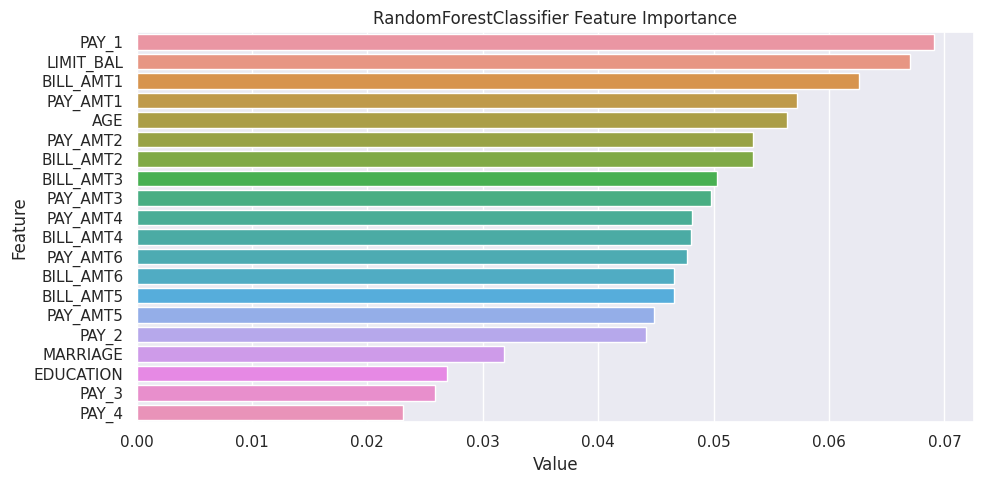

In [41]:
plotImp(best_rf_up, features_train_upsampled)

## AdaBoost

AdaBoost (Adaptive Boosting) is an ensemble learning technique used for classification tasks in machine learning. AdaBoost combines multiple weak classifiers (e.g., decision trees) and assigns higher weights to misclassified instances in each iteration, emphasizing harder-to-predict data points. This iterative process results in a strong classifier, leveraging the collective wisdom of the weak classifiers.

In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

### Upsampled Dataset

#### The Model

First, let's search for the best hyperparameters using `GridSearchCV`

In [43]:
param_grid_adaBoost = {
    'n_estimators': [50, 100, 150],  # Number of weak learners
    'learning_rate': [0.1, 0.5, 1.0],  # Learning rate of the model
}

In [44]:
base_estimator = DecisionTreeClassifier(max_depth=1)
adaBoost = AdaBoostClassifier(estimator=base_estimator)
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

In [45]:
grid_search_adaBoost_up = GridSearchCV(adaBoost, param_grid_adaBoost, cv=kf, scoring='f1', n_jobs=-1)
grid_search_adaBoost_up.fit(features_train_upsampled, target_train_upsampled.values.ravel())

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 150]},
             scoring='f1')

In [46]:
best_adaBoost_up = grid_search_adaBoost_up.best_estimator_
print('AdaBoost Best Parameters:', grid_search_adaBoost_up.best_params_)

target_pred_adaBoost = best_adaBoost_up.predict(features_test_upsampled)

best_f1_adaBoost_up = grid_search_adaBoost_up.best_score_
print('AdaBoost Best F1-score:')
print('Train: ', round(best_f1_adaBoost_up, 3), '     Test: ', round((f1_score(target_test_upsampled, target_pred_adaBoost)), 3))
print('Test Accuracy: ', round(accuracy_score(target_test_upsampled, target_pred_adaBoost)*100, 3), '%')

AdaBoost Best Parameters: {'learning_rate': 1.0, 'n_estimators': 150}
AdaBoost Best F1-score:
Train:  0.747      Test:  0.741
Test Accuracy:  75.23 %


#### Confusion Matrix

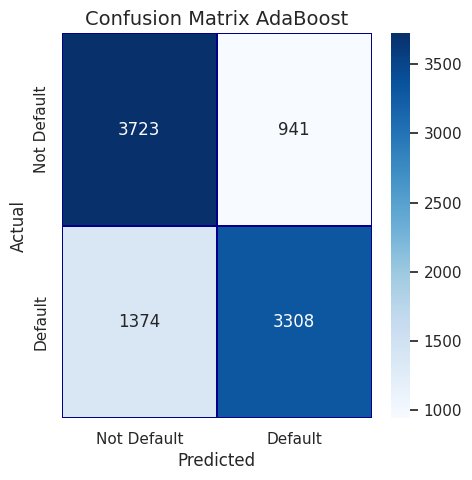

In [47]:
cm = pd.crosstab(target_test_upsampled.values.ravel(), target_pred_adaBoost, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues", fmt='d')
plt.title('Confusion Matrix AdaBoost', fontsize=14)
plt.show()

#### Feature Importance

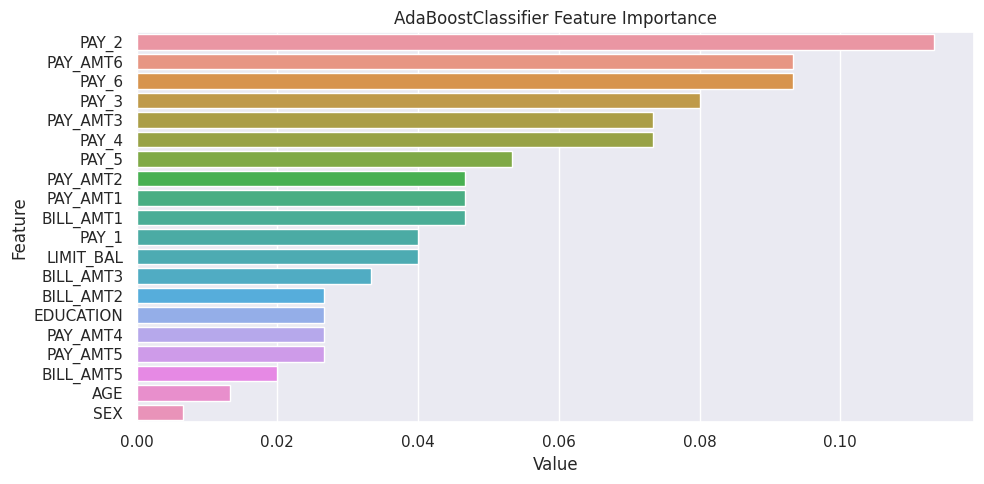

In [48]:
plotImp(best_adaBoost_up, features_train_upsampled)

## XGBoost

XGBoost (Extreme Gradient Boosting) is a powerful and efficient machine learning algorithm used for classification tasks. It combines the strengths of gradient boosting and regularization techniques to create a highly accurate and robust model. XGBoost is widely used due to its ability to handle large datasets, feature importance insights, and excellent performance.

In [49]:
import xgboost as xgb

### Upsampled Dataset

#### The Model

First, let's search for the best hyperparameters using `GridSearchCV`

In [50]:
param_grid_xgb = {
    'n_estimators': [50, 100, 150],  # Number of boosting rounds
    'max_depth': [3, 5, 7],  # Maximum depth of the trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used in boosting
    'subsample': [0.8, 1.0],  # Fraction of samples used for fitting the trees
}

In [51]:
xgb_cl = xgb.XGBClassifier()
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

In [52]:
grid_search_xgb_up = GridSearchCV(xgb_cl, param_grid_xgb, cv=kf, scoring='f1', n_jobs=-1)
grid_search_xgb_up.fit(features_train_upsampled, target_train_upsampled.values.ravel())

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     int...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 1.0]},
             scoring='f1')

In [53]:
best_xgb_up = grid_search_xgb_up.best_estimator_
print('XGBoost Best Parameters:', grid_search_xgb_up.best_params_)

target_pred_xgb = best_xgb_up.predict(features_test_upsampled)

best_f1_xgb_up = grid_search_xgb_up.best_score_
print('XGBoost Best F1-score:')
print('Train: ', round(best_f1_xgb_up, 3), '     Test: ', round((f1_score(target_test_upsampled, target_pred_xgb)), 3))
print('Test Accuracy: ', round(accuracy_score(target_test_upsampled, target_pred_xgb)*100, 3), '%')

XGBoost Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150, 'subsample': 1.0}
XGBoost Best F1-score:
Train:  0.819      Test:  0.819
Test Accuracy:  82.452 %


#### Confusion Matrix

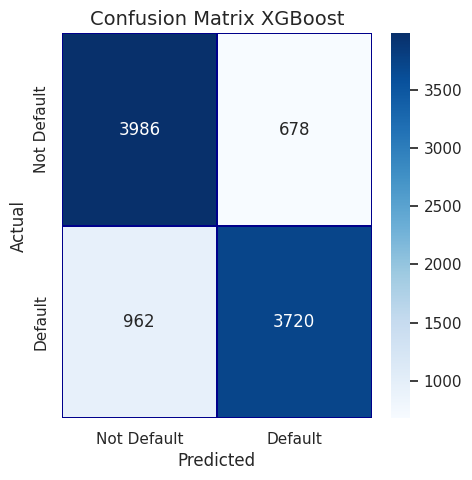

In [54]:
cm = pd.crosstab(target_test_upsampled.values.ravel(), target_pred_xgb, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues", fmt='d')
plt.title('Confusion Matrix XGBoost', fontsize=14)
plt.show()

#### Feature Importance

<Axes: title={'center': 'Features importance (XGBoost)'}, xlabel='F score', ylabel='Features'>

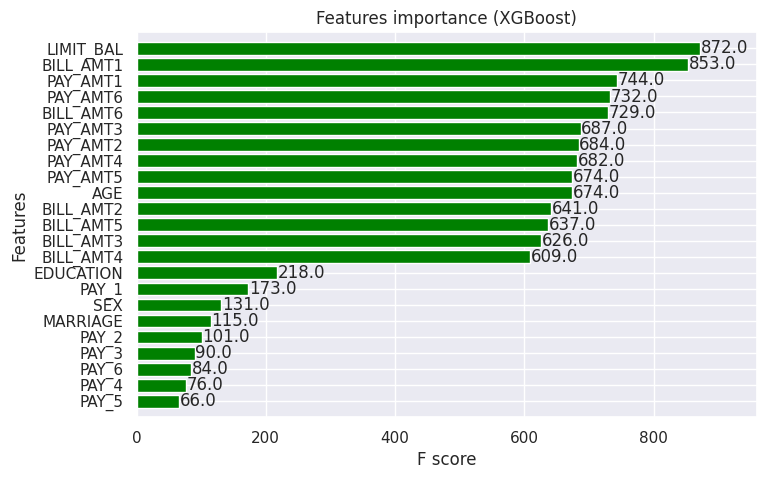

In [55]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(best_xgb_up, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green")

## LightGBM

LightGBM (Light Gradient Boosting Machine) is a popular and efficient gradient boosting framework for classification tasks. It uses a tree-based learning algorithm, designed to handle large-scale datasets, and offers high-speed and high-performance training with the flexibility to customize hyperparameters for improved accuracy.

In [56]:
import lightgbm as lgb

### Upsampled Dataset

#### The Model

First, let's search for the best hyperparameters using `GridSearchCV`

In [57]:
param_grid_lgb = {
    'boosting_type': ['gbdt', 'dart'], # Different boosting types
    'num_leaves': [30, 50, 100],       # Maximum number of leaves in one tree
    'max_depth': [-1, 5, 10],          # Maximum tree depth for base learners (-1 means no limit)
    'learning_rate': [0.01, 0.1, 0.2], # Learning rate
    'n_estimators': [50, 100, 200]     # Number of boosting iterations
}

In [58]:
lgb_cl = lgb.LGBMClassifier()
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

In [59]:
grid_search_lgb_up = GridSearchCV(lgb_cl, param_grid_lgb, cv=kf, scoring='f1', n_jobs=-1)
grid_search_lgb_up.fit(features_train_upsampled, target_train_upsampled.values.ravel())

[LightGBM] [Info] Number of positive: 18682, number of negative: 18700
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3427
[LightGBM] [Info] Number of data points in the train set: 37382, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499759 -> initscore=-0.000963
[LightGBM] [Info] Start training from score -0.000963


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [-1, 5, 10],
                         'n_estimators': [50, 100, 200],
                         'num_leaves': [30, 50, 100]},
             scoring='f1')

In [60]:
best_lgb_up = grid_search_lgb_up.best_estimator_
print('LightGBM Best Parameters:', grid_search_lgb_up.best_params_)

target_pred_lgb = best_lgb_up.predict(features_test_upsampled)

best_f1_lgb_up = grid_search_lgb_up.best_score_
print('LightGBM Best F1-score:')
print('Train: ', round(best_f1_lgb_up, 3), '     Test: ', round(f1_score(target_test_upsampled, target_pred_lgb), 3))
print('Test Accuracy: ', round(accuracy_score(target_test_upsampled, target_pred_lgb)*100, 3), '%')

LightGBM Best Parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.2, 'max_depth': -1, 'n_estimators': 200, 'num_leaves': 100}
LightGBM Best F1-score:
Train:  0.833      Test:  0.839
Test Accuracy:  84.186 %


#### Confusion Matrix

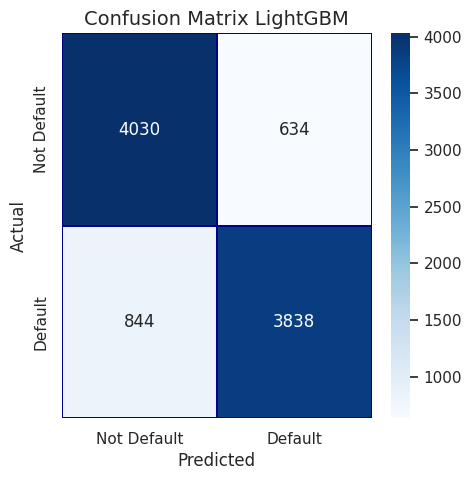

In [61]:
cm = pd.crosstab(target_test_upsampled.values.ravel(), target_pred_lgb, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues", fmt='d')
plt.title('Confusion Matrix LightGBM', fontsize=14)
plt.show()

#### Feature Importance

<Axes: title={'center': 'Features importance (LightGBM)'}, xlabel='Feature importance', ylabel='Features'>

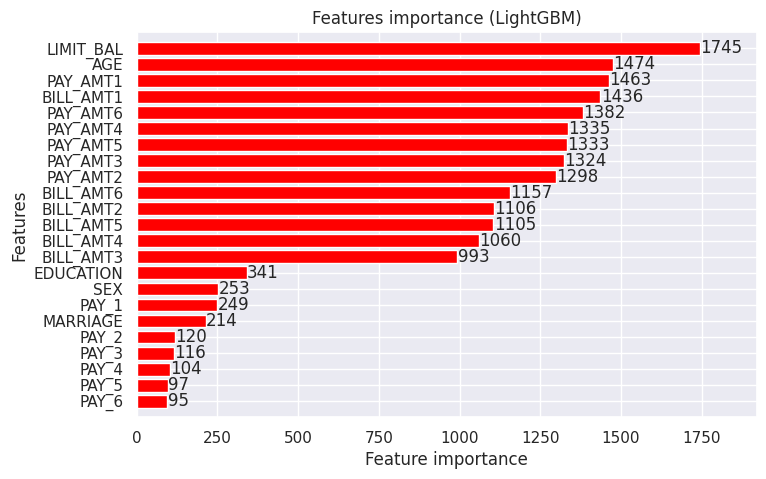

In [62]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
lgb.plot_importance(best_lgb_up, height=0.8, title="Features importance (LightGBM)", ax=ax,color="red")

## 5. Conclusion

In our analysis of credit card default prediction, we addressed the challenge of imbalanced data using the SMOTE-upsampling technique. This method involved creating synthetic samples to balance the representation of both classes in the dataset. We compared the performance of models trained on the original dataset and the upsampled dataset using the Logistic Regression algorithm.

### Original vs. SMOTE-Upsampled Logistic Regression:

We first evaluated the performance of Logistic Regression on the original dataset and the SMOTE-upsampled dataset. The results were as follows:

* Non-SMOTE Logistic Regression
  - Best F1-score: <br> Train:  0.415 &emsp;&emsp; Test:  0.419
  - Test Accuracy:  55.75 %

* SMOTE-Upsampled Logistic Regression
  - Best F1-score: <br> Train:  0.664 &emsp;&emsp; Test:  0.65
  - Test Accuracy:  61.352 %

The SMOTE-upsampled dataset demonstrated notable improvements in both F1-score and accuracy when compared to the original dataset, indicating that the synthetic samples introduced by SMOTE contributed positively to model performance.


### Algorithm Performance Comparison:

Continuing with the upsampled dataset, we explored the performance of various machine learning algorithms—Logistic Regression, Random Forest, AdaBoost, XGBoost, and LightGBM—to identify the most effective model for credit card default prediction. Among these algorithms, LightGBM emerged as the standout performer with an accuracy of 84.186%.

To provide a concise overview of each algorithm's performance, we present a summary in the table below:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 20px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 20px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-c3ow" rowspan="2">Algorithm</th>
    <th class="tg-c3ow" colspan="2">F1 Score</th>
    <th class="tg-c3ow" rowspan="2">Test<br>Accuracy</th>
  </tr>
  <tr>
    <th class="tg-c3ow">Train</th>
    <th class="tg-c3ow">Test</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">Logistic Regression</td>
    <td class="tg-0pky">0.664</td>
    <td class="tg-0pky">0.65</td>
    <td class="tg-0pky">61.352%</td>
  </tr>
  <tr>
    <td class="tg-0pky">Random Forest</td>
    <td class="tg-0pky">0.832</td>
    <td class="tg-0pky">0.832</td>
    <td class="tg-0pky">83.715%</td>
  </tr>
  <tr>
    <td class="tg-0pky">AdaBoost</td>
    <td class="tg-0pky">0.747</td>
    <td class="tg-0pky">0.741</td>
    <td class="tg-0pky">75.23%</td>
  </tr>
  <tr>
    <td class="tg-0pky">XGBoost</td>
    <td class="tg-0pky">0.819</td>
    <td class="tg-0pky">0.819</td>
    <td class="tg-0pky">82.452%</td>
  </tr>
  <tr>
    <td class="tg-0pky">LightGBM</td>
    <td class="tg-0pky">0.833</td>
    <td class="tg-0pky">0.839</td>
    <td class="tg-0pky">84.186%</td>
  </tr>
</tbody>
</table>

In summary, our approach of addressing dataset imbalance through SMOTE-upsampling resulted in significant performance enhancements for credit card default prediction. The superiority of LightGBM in accurately classifying default cases indicates its potential for practical implementation in real-world scenarios, providing valuable insights for risk assessment and decision-making.